In [14]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def mse(y_true: np.ndarray, y_pred: np.ndarray):

    if isinstance(y_true, list):
        y_true = np.array(y_true)
    if isinstance(y_pred, list):
        y_pred = np.array(y_pred)

    if y_true.shape != y_pred.shape:
        raise ValueError("the two inputs y_pred and y_true must have the same dimension")
    
    squared = np.square(y_true - y_pred)
    mean_squared = np.mean(a=squared, axis = 0)
    
    return np.sum(a = mean_squared, axis=0)

def rmse(y_true: np.ndarray, y_pred: np.ndarray):
    return np.sqrt(mse(y_true=y_true, y_pred=y_pred))

def mae(y_true: np.ndarray, y_pred: np.ndarray):

    if isinstance(y_true, list):
        y_true = np.array(y_true)
    if isinstance(y_pred, list):
        y_pred = np.array(y_pred)
        
    if y_true.shape != y_pred.shape:
        raise ValueError("the two inputs y_pred and y_true must have the same dimension")
    diff = np.abs(y_true - y_pred)
    mean_absulue = np.mean(a=diff, axis = 0)
    
    return np.sum(a=mean_absulue, axis = 0)

In [3]:
class LinearRegression:

    def __init__(self, random_state: int = 42, learning_rate: float = 1e-4, max_iterations: int = 1000000, stopping_threshold: float = 1e-6):
        self.random_state = random_state
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.stopping_threshold = stopping_threshold
        self.W = None
        self.coef, self.intercept = None, None
        self.history = []
        

    def __init_params(self,dim: int):
        np.random.seed(self.random_state)
        self.W = np.random.rand(dim +1)

    def predict(self, X: np.ndarray) :
        ones = np.ones((X.shape[0], 1))
        X = np.copy(X)
        X = np.concatenate((ones, X), axis = 1)
        return np.dot(X,self.W)
    
    def score(self, X: np.ndarray, Y):
        y_pred = self.predict(X)
        u = ((Y - y_pred)**2).sum(axis=0)
        v= ((Y - Y.mean(axis=0))**2).sum(axis=0)
        return 1 - (u/v)
    
    def __gradient_descent(self, X: np.ndarray, Y_true: np.ndarray, Y_pred: np.ndarray):

        m = X.shape[0]
        diff = Y_pred - Y_true
        return np.concatenate((np.sum(a=diff, axis = 0, keepdims=True), np.sum(diff[:, np.newaxis] * X, axis= 0)))/m
    

    def __update_params(self,X: np.ndarray,Y_true: np.ndarray,Y_pred: np.ndarray, learning_rate):
        
        dW= self.__gradient_descent(X=X,Y_true=Y_true, Y_pred=Y_pred)
        self.W = self.W - learning_rate * dW
    
    def fit(self, X: np.ndarray, Y: np.ndarray):

        n, p = X.shape
        cost_history = []

        self.__init_params(p)
        previous_cost = None
        
        for itr in range(self.max_iterations):

            Y_pred = self.predict(X)
            
            cost = mse(y_true=Y, y_pred=Y_pred)
            self.history.append(cost)

            if previous_cost and abs(previous_cost-cost)<=self.stopping_threshold:
                break

            self.__update_params(X=X, Y_true=Y, Y_pred=Y_pred, learning_rate=self.learning_rate)

        self.intercept, self.coef = self.W[0], self.W[1:]
        

In [4]:
lr = LinearRegression(max_iterations=100000)

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])


y = np.dot(X, np.array([1, 2])) + 3

lr.fit(X, y)

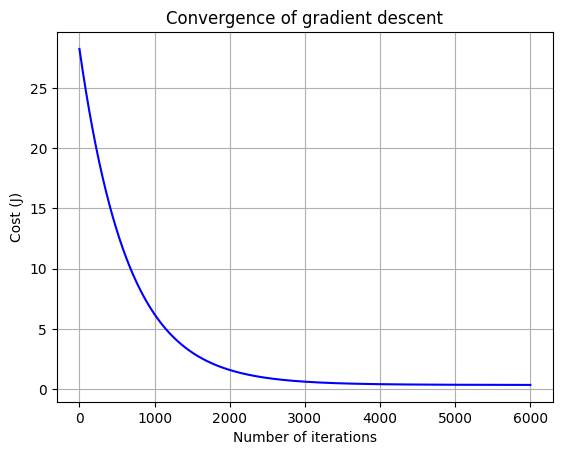

In [ ]:

plt.plot(range(1, lr.max_iterations + 1)[:6000], lr.history[:6000], color='blue')
plt.rcParams["figure.figsize"] = (20, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()

In [6]:
lr.coef

array([1.53335983, 2.02420127])

In [7]:
lr.intercept

2.081851112878504

In [8]:
lr.score(X=X, Y=y)

0.9745464520082097

In [9]:
lr.predict(X)

array([ 5.63941221,  7.66361348,  9.19697331, 11.22117458])

In [10]:
lr.W

array([2.08185111, 1.53335983, 2.02420127])

In [11]:
X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
  55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
  45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
  48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754]).reshape((-1, 1))
Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
  78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
  55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
  60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

model = LinearRegression(max_iterations=100000)

model.fit(X=X, Y=Y)

In [12]:
model.score(X=X, Y=Y)

0.5459774884141415

In [13]:
model.history

[576.3733346969173,
 363.37559548593447,
 245.34838351874595,
 179.94664341811864,
 143.70595327216776,
 123.62410796499333,
 112.49627038146014,
 106.33006558263187,
 102.91322181297323,
 101.01986565247827,
 99.97071091575087,
 99.38934865702281,
 99.06720155277341,
 98.88869185073044,
 98.78977511598227,
 98.73496277427884,
 98.70458974614779,
 98.68775913424051,
 98.67843270352232,
 98.67326452155336,
 98.67040052604105,
 98.66881333611397,
 98.66793365512089,
 98.66744602198362,
 98.66717563207007,
 98.66702562189492,
 98.66694231705257,
 98.66689597525328,
 98.66687011557319,
 98.66685560553289,
 98.66684738460393,
 98.66684264862485,
 98.666839843742,
 98.66683810892704,
 98.66683696706353,
 98.66683615376971,
 98.66683552254503,
 98.66683499221017,
 98.66683451778162,
 98.66683407433297,
 98.66683364805183,
 98.66683323128446,
 98.66683281978978,
 98.66683241121754,
 98.66683200426563,
 98.66683159821235,
 98.66683119265795,
 98.66683078738068,
 98.66683038225791,
 98.666829977

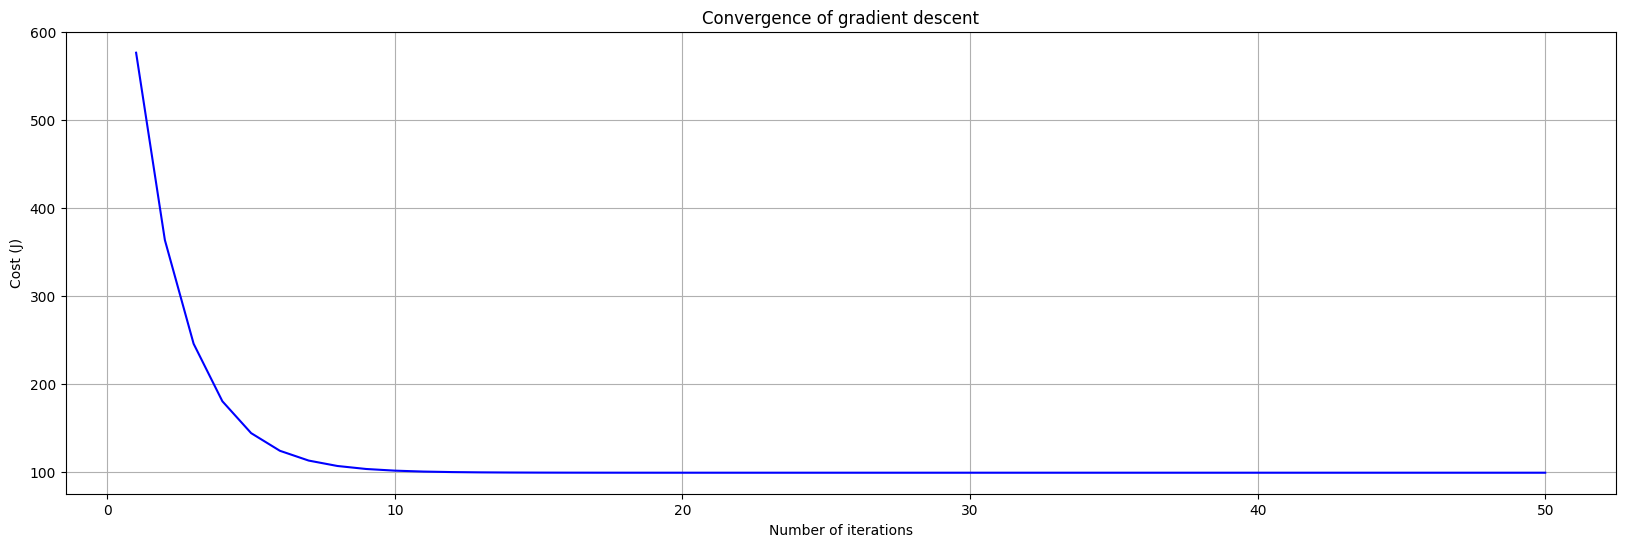

In [15]:

# Plot the cost history
plt.plot(range(1, model.max_iterations + 1)[:50], model.history[:50], color='blue')
plt.rcParams["figure.figsize"] = (20, 6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()